In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,  KFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [20]:
df = pd.read_csv('../../data/telecom_pca.csv')
x = df.drop(columns=['TARGET'])
y = df['TARGET']

In [21]:
x

,Unnamed: 0,YEAR_JOINED,CURRENT_YEAR,BILL_AMOUNT,PAID_AMOUNT,PAYMENT_TRANSACTIONS,PARTY_REV,PREPAID_LINES,POSTPAID_LINES,OTHER_LINES,LINE_REV,MOUS_TO_LOCAL_MOBILES,MOUS_FROM_LOCAL_MOBILES,MOUS_TO_LOCAL_LANDLINES,MOUS_FROM_LOCAL_LANDLINES,MOUS_TO_INT_NUMBER,MOUS_FROM_INT_NUMBER,DATA_IN_BNDL,DATA_OUT_BNDL
0,0,1994,2019,931.208938,812.175000,1,5968.700000,2,6,2,945.040000,1004.070,35.850,34.015,72.075,141.840,56.115,11944.079102,0.0
1,1,1994,2019,431.082618,486.500000,1,6245.141667,6,4,2,493.815000,159.050,10.595,7.715,11.750,5.110,0.000,9903.157715,0.0
2,2,1994,2019,50.619644,52.815000,1,1666.488333,2,3,1,50.300000,0.000,0.000,0.000,0.000,0.000,0.000,0.102539,0.0
3,3,1994,2019,399.710034,422.235000,1,2522.008333,3,4,3,406.586667,288.805,158.500,2.670,15.965,0.000,0.000,3600.322266,0.0
4,4,1994,2019,612.665844,825.888333,1,1219.961667,0,2,1,751.185000,209.760,186.050,17.515,28.685,3.235,4.475,3852.026367,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140599,1140599,2017,2019,297.752650,313.950000,1,2418.486667,5,4,3,303.166667,0.000,0.000,0.000,0.000,0.000,0.000,307945.957031,0.0
1140600,1140600,2017,2019,160.663773,178.500000,1,454.116667,0,1,1,170.000000,0.000,0.000,0.000,0.000,0.000,0.000,22647.873535,0.0
1140601,1140601,2017,2019,570.147016,642.911667,1,615.866667,1,1,0,609.630000,154.150,64.990,3.660,10.050,0.000,0.000,17582.867188,0.0
1140602,1140602,2017,2019,452.736799,525.413333,2,735.645000,1,2,0,414.840000,218.805,102.075,54.065,7.980,5.350,0.065,3015.338867,0.0


In [22]:
y.value_counts()

0    1080399
1      60205
Name: TARGET, dtype: int64

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state= 1)

In [24]:
logistic_regression = LogisticRegression(random_state=0, max_iter = 300)

In [25]:
kfold = KFold(n_splits = 5, random_state=42, shuffle=True)
cv_results = cross_val_score(logistic_regression, x,y, cv = kfold, scoring='accuracy', verbose = 10)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] START .....................................................................
[CV] END ................................ score: (test=0.947) total time=   7.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


[CV] END ................................ score: (test=0.948) total time=   8.4s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.6s remaining:    0.0s


[CV] END ................................ score: (test=0.947) total time=  18.6s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   35.3s remaining:    0.0s


[CV] END ................................ score: (test=0.947) total time=   9.9s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   45.4s remaining:    0.0s


[CV] END ................................ score: (test=0.947) total time=  13.6s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   59.1s finished


In [26]:
print(cv_results.mean(), cv_results.std())

0.9472139316931178 0.0005364297345475543


In [27]:
logistic_regression = logistic_regression.fit(x_train, y_train)

In [28]:
y_pred = cross_val_predict(logistic_regression, x,y, cv = kfold)

In [29]:
logistic_regression.score(x_test,y_test)

0.9472314668368689

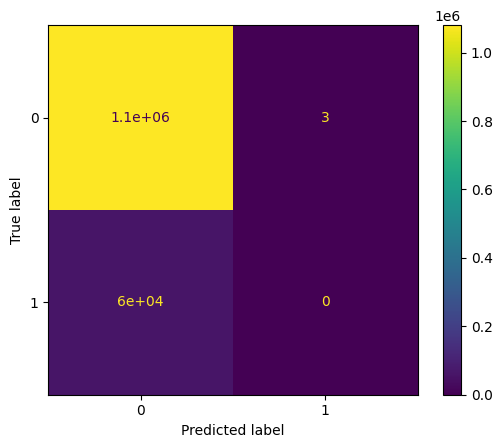

In [30]:
cm = confusion_matrix(y, y_pred)
cm_plot = ConfusionMatrixDisplay(cm).plot()

In [31]:
a,b,c,d = cm.ravel()
(a,b,c,d)

(1080396, 3, 60205, 0)

In [32]:
percentage_A = a / (a + b) #True positives = True positives / (True positives + false positives)
percentage_D = d / (d + c) #True positives = True negatives / (True negatives + false negatives)
print("Precission in true positives (A):",percentage_A," Precission in true negatives (D):",percentage_D)

Precission in true positives (A): 0.9999972232480778  Precission in true negatives (D): 0.0


In [33]:
def getChurnProbabilities(clf, x):
    return clf.predict_proba(x)

In [34]:
proba_matrix = getChurnProbabilities(logistic_regression, x)

In [35]:
#function to set each client according to low, mid or high churn chance (given low and high percentages by the user)
def showProbabilities(low,mid,high):
    clients_permanent = []
    clients_low = []
    clients_mid = []
    clients_high = []
    i = 0
    #for each client in the data set
    for client in proba_matrix:
        #get all their data and their churn chance into one list
        client_index = x.index[i]
        client_info = x.loc[client_index].values
        client_info = np.append(client_info,client[1])
        #store client data into profiles(permanent, low, mid, high) list
        if client[1] < low:
            clients_permanent.append(client_info)
        elif client[1] < mid:
            clients_low.append(client_info)
        elif client[1] < high:
            clients_mid.append(client_info)
        else:
            clients_high.append(client_info)
        i += 1
    return clients_permanent, clients_low, clients_mid, clients_high

In [36]:
clients_permanent, clients_low, clients_mid, clients_high = showProbabilities(.30,.60,.80)

print(len(clients_permanent), " clients have no churn chances")
print(len(clients_low), " clients have low churn chances")
print(len(clients_mid), " clients have mid churn chances")
print(len(clients_high), " clients have high churn chances")

1140590  clients have no churn chances
14  clients have low churn chances
0  clients have mid churn chances
0  clients have high churn chances
